<a href="https://colab.research.google.com/github/SpandanJogannagari/Machine-Learning-Homeworks/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn import tree

from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn import svm
import seaborn as sns
import math

TASK-5

In [2]:

x1 = [1,2,2,0,1,0]
x2 = [1,2,0,0,0,1]
cls = ['+','+','+','-','-','-']
dict = {"class":cls,"x1":x1,"x2":x2}
df = pd.DataFrame(dict)
df

,class,x1,x2
0,+,1,1
1,+,2,2
2,+,2,0
3,-,0,0
4,-,1,0
5,-,0,1


In [48]:

datapoints = df[['x1','x2']].values
y = df['class'].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


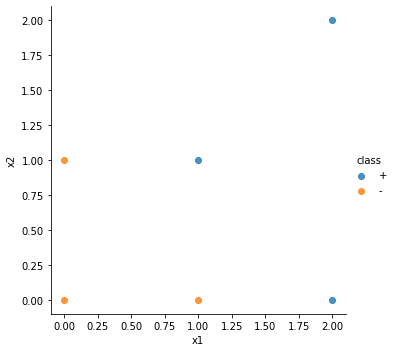

In [49]:
sns.lmplot('x1','x2',data = df, hue='class',fit_reg = False);

C =  1.0
MaxMargin =  1.5811388300841893
Weight(W)=  [-1.2 -0.4]
Bias(b)= 1.4
Support Vectors =  [[1. 1.]
 [2. 0.]
 [1. 0.]
 [0. 1.]]
Plane Slope = -3.0000000000000004


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


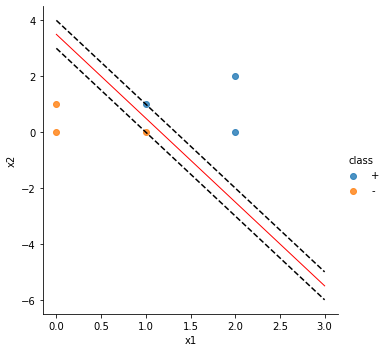

In [55]:
C = [1.0,2.0,3.0]

Weight = list()
bias = list()
MaxMargin = 0
slope =0
for j in C:
    Model = svm.SVC(C = j, kernel = 'linear')
    Model.fit(datapoints,y)
    W = Model.coef_[0]
    sum = 0
    for i in W:
        sum = sum + i*i;
    w = math.sqrt(sum)
    Margin = 2 / w;
    
    if(MaxMargin < Margin):
        print("C = ", j)
        print("MaxMargin = ", Margin)
        MaxMargin = Margin
        Weight.append(W)
        b = Model.intercept_[0]
        bias.append(b)
        print("Weight(W)= ", W)
        print("Bias(b)=", b)
        print("Support Vectors = ",Model.support_vectors_)
        s = -W[0]/W[1]
        print("Plane Slope =", s)
        slope = s
W = Weight[0]
b = bias[0]
X = np.linspace(0,3)
Y = slope* X - (b/W[1])
  
s1 = Model.support_vectors_[0]
Y_down = slope* X + (s1[1] - slope*s1[0])
 
s2 = Model.support_vectors_[2]
Y_up = slope* X + (s2[1] - slope*s2[0])
sns.lmplot('x1','x2',data = df, hue='class',fit_reg = False);
plt.plot(X,Y, linewidth = 1, color = 'red')
plt.plot(X,Y_down, 'k--')
plt.plot(X,Y_up,'k--')

TASK 6

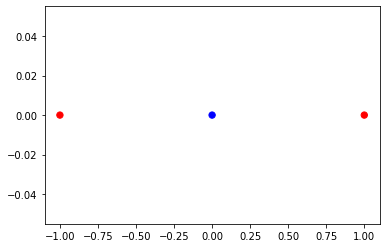

In [7]:
X = np.array([-1, 0, 1])
Y = np.array([1, 0, 1])

plt.scatter(X, [0, 0, 0], c=['red', 'blue', 'red'], s=40, cmap=plt.cm.Paired)

plt.show()

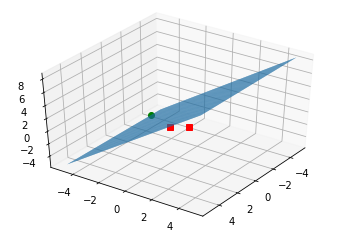

In [22]:
X = np.array([[1, 0, 0], [1, -1*np.sqrt(2), 1],[1, np.sqrt(2), 1]])
Y = np.array([1, 0, 1])
model = svm.SVC(kernel='linear')
K = model.fit(X, Y)
temp = np.linspace(-5,5,100)
x,y = np.meshgrid(temp,temp)
fig = plt.figure()
fig1 = fig.add_subplot(projection = '3d')

fig1.plot3D(X[Y == 0,0], X[Y == 0,1], X[Y == 0,2],'og')
fig1.plot3D(X[Y == 1,0], X[Y == 1,1], X[Y == 1,2],'sr')
fig1.plot_surface(x,y, (-model.intercept_[0]-model.coef_[0][0]*x-model.coef_[0][1]*y)/model.coef_[0][2])
fig1.view_init(40, 35)
plt.show()


TASK 7

In [38]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [39]:
Full_data=[df_train,df_test]

for dataset in Full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

    #Map any null values to median of the fare value
    dataset['Fare'] = dataset['Fare'].fillna(df_train['Fare'].median())

    #Map any Age values to mean of the age value
    dataset['Age'] = dataset['Age'].fillna(df_train['Age'].mean())

    #Map Null values in Embarked column to S as we have most of the values as S
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    #Calculating Familysize in order to find if the person is travelling alone or not
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

#Map if a person is travelling alone or has some family members with him

for dataset in Full_data:
    dataset['isAlone']='0'
    dataset.loc[dataset['FamilySize'] == 1, 'isAlone'] = 1

#categorize age values into 5 classe groups
for dataset in Full_data:
    dataset.loc[ dataset['Age'] <= 18, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 35), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 50), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 65), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 65, 'Age'] = 4;
    dataset['Age'] = dataset['Age'].astype(int);

 # categorize  fare data tnto 3 Mapping Fare
for dataset in Full_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int);

#categorize Embarked into three types
for dataset in Full_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [40]:
#As we have lot of null values in Cabin we can ignore that as we have only 204 records in it.
#we will remove Ticket aswell as we do not use it for our comparision
#we will remove Passenger id aswell as we are not categorize that data in our data
#we are removing FamilySize aswell as we will not categorize it any how
drop_features = ['PassengerId','Ticket','Cabin','Name','Parch','SibSp']
df_train = df_train.drop(drop_features, axis = 1)
df_test  = df_test.drop(drop_features, axis = 1)


In [41]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone
0,0,3,1,1,0,0,2,0
1,1,1,0,2,3,1,2,0
2,1,3,0,1,1,0,1,1
3,1,1,0,1,3,0,2,0
4,0,3,1,1,1,0,1,1


In [42]:
#we are training the dataset for DecisionTree Classification model
a = df_train.drop("Survived", axis=1)
b = df_train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(a,b,test_size=0.3,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 7), (268, 7), (623,), (268,))

Accuracy for linear kernel

In [43]:
K = svm.SVC(kernel='linear')    # create the new kernel
K.fit(X_train, y_train.ravel());
accuracy_score = cross_val_score(K, X_train, y_train.ravel(), cv=5, scoring='accuracy').mean()
print("Accuracy for Linear Kernel:", accuracy_score)

Accuracy for Linear Kernel: 0.8009677419354839


Accuracy for polynomial function of degree 2(Quadratic)

In [44]:

p = svm.SVC(kernel='poly', degree=2)
p.fit(X_train, y_train.ravel());
accuracy_score = cross_val_score(p, X_train, y_train.ravel(), cv=5, scoring='accuracy').mean()
print("Accuracy for Quadratic Kernel:", accuracy_score)

Accuracy for Quadratic Kernel: 0.8170064516129031


Accuracy for RBF Kernel

In [46]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train.ravel());

# Calculate the accuracy using cross-validation.
accuracy_score = cross_val_score(clf, X_train, y_train.ravel(), cv=5, scoring='accuracy').mean()
print("Accuracy for RBF Kernel:", accuracy_score)

Accuracy for RBF Kernel: 0.8250451612903227
